In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.io as pio
from plotly.subplots import make_subplots
# setting default template to plotly_white for all visualizations
pio.templates.default = "plotly_white"
%matplotlib inline
import gc
from colorama import Fore, Back, Style

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
c_ = Fore.CYAN
res = Style.RESET_ALL

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install python-gdcm

     |████████████████████████████████| 9.4 MB 4.4 MB/s 


In [3]:
PATH = '/kaggle/input/siim-covid19-detection/'
submission = pd.read_csv('/kaggle/input/siim-covid19-detection/sample_submission.csv', index_col=None)
image_df = pd.read_csv('/kaggle/input/siim-covid19-detection/train_image_level.csv', index_col=None)
study_df = pd.read_csv('/kaggle/input/siim-covid19-detection/train_study_level.csv', index_col=None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
print(f"{y_}Train image level csv shape : {image_df.shape}{res}\n{g_}Train study level csv shape : {study_df.shape}{res}")

Train image level csv shape : (6334, 4)
Train study level csv shape : (6054, 5)


In [4]:
image_df

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc_image,"[{'x': 677.42216, 'y': 197.97662, 'width': 867.79767, 'height': 999.78214}, {'x': 1792.69064, 'y': 402.5525, 'width': 617.02734, 'height': 1204.358}]",opacity 1 677.42216 197.97662 1545.21983 1197.75876 opacity 1 1792.69064 402.5525 2409.71798 1606.9105,9d514ce429a7
3,001398f4ff4f_image,"[{'x': 2729, 'y': 2181.33331, 'width': 948.00012, 'height': 604}]",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891_image,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'height': 1106}, {'x': 2578.56661, 'y': 998.66667, 'width': 662.66667, 'height': 1120}]",opacity 1 623.23328 1050 1337.23328 2156 opacity 1 2578.56661 998.66667 3241.23328 2118.66667,dfd9fdd85a3e
...,...,...,...,...
6329,ffcc6edd9445_image,NaN,none 1 0 0 1 1,7e6c68462e06
6330,ffd91a2c4ca0_image,NaN,none 1 0 0 1 1,8332bdaddb6e
6331,ffd9b6cf2961_image,"[{'x': 2197.38566, 'y': 841.07361, 'width': 316.41699, 'height': 451.63758}, {'x': 2375.87717, 'y': 1830.89015, 'width': 267.7373, 'height': 305.59912}, {'x': 707.25199, 'y': 722.07926, 'width': 392.14044, 'height': 849.18683}]",opacity 1 2197.38566 841.07361 2513.80265 1292.71119 opacity 1 2375.87717 1830.89015 2643.6144700000004 2136.48927 opacity 1 707.25199 722.07926 1099.3924299999999 1571.26609,7eed9af03814
6332,ffdc682f7680_image,"[{'x': 2729.27083, 'y': 332.26044, 'width': 1496.25016, 'height': 2604.58334}, {'x': 1005.8125, 'y': 1584.67711, 'width': 662.22913, 'height': 775.83337}]",opacity 1 2729.27083 332.26044 4225.52099 2936.84378 opacity 1 1005.8125 1584.67711 1668.0416300000002 2360.51048,a0cb0b96fb3d


In [5]:
study_df

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0
3,005057b3f880_study,1,0,0,0
4,0051d9b12e72_study,0,0,0,1
...,...,...,...,...,...
6049,ffcb4630f46f_study,0,1,0,0
6050,ffe4d6e8fbb0_study,0,1,0,0
6051,ffe94fcb14fa_study,0,1,0,0
6052,ffebf1ef4a9c_study,0,1,0,0


In [6]:
study_grp = pd.melt(study_df, id_vars=list(study_df.columns)[:1], value_vars=list(study_df.columns)[1:],
             var_name='label', value_name='value')
study_grp = study_grp.loc[study_grp['value']!=0]

In [7]:
from ast import literal_eval


try:
    box = literal_eval(image_df.loc[image_df['StudyInstanceUID']=='5776db0cec75']['boxes'].values[0])
except ValueError:
    pass

In [8]:
box[0]['y']

582.43035

In [9]:
np.unique(image_df.StudyInstanceUID).size

6054

In [10]:
study_grp = pd.melt(study_df, id_vars=list(study_df.columns)[:1], value_vars=list(study_df.columns)[1:],
             var_name='label', value_name='value')

study_grp = study_grp.loc[study_grp['value']!=0]
colors = {'Typical Appearance' : '#DCD427',
'Negative for Pneumonia' : '#0092CC',
'Indeterminate Appearance' : '#CC3333',

          'Atypical Appearance' : '#E6E6E6'
         }

study_grp = study_grp.groupby('label').sum().sort_values('value',ascending=False).reset_index()
study_grp['color'] = study_grp['label'].apply(lambda x: colors[x])
study_grp

,label,value,color
0,Typical Appearance,2855,#DCD427
1,Negative for Pneumonia,1676,#0092CC
2,Indeterminate Appearance,1049,#CC3333
3,Atypical Appearance,474,#E6E6E6


In [11]:
def plot_study_label(df):
    pio.templates.default = "plotly_dark"
    fig = px.bar(df, x='label', y='value',
             hover_data=['label', 'value'], color='label',
             #labels={column: label},
             color_discrete_map=colors,
             text='value')
    fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray': df['label'],
                           
                             'title' : None, 
                             'showgrid':False},
                      yaxis={'showgrid':False,
                            'title' : 'Count'},
                      showlegend=False,
                     title = 'Study samples in train data')
    fig.update_traces(textfont_size=16)
    fig.show()

In [12]:
plot_study_label(study_grp)

In [13]:
study_grp['pct'] = round((study_grp['value'] / study_grp['value'].sum())*100,2)

fig = go.Figure(data=[go.Pie(labels=study_grp['label'],
                             values=study_grp['pct'],
                             hole=.3,
                             pull=[0.1, 0.1, 0.1, 0.1]
                            )
                     ]
               )
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=16,
                  marker=dict(colors=study_grp['color'], line=dict(color='#000000', width=2))
                 )
fig.update_layout(title={'text': "% of labels in training data",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [14]:
from pydicom import dcmread, read_file
from pydicom.data import get_testdata_file

file_path = PATH+"train/00086460a852/9e8302230c91/65761e66de9f.dcm"
dicom = read_file(file_path, stop_before_pixels=False)

In [15]:
dicom

Dataset.file_meta -------------------------------
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.59189821846420219299438915042640676800
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', '']
(0008, 0016) SOP Class UID                       UI: 71228e4340de
(0008, 0018) SOP Instance UID                    UI: 65761e66de9f
(0008, 0020) Study Date                          DA: '4545ba78b753'
(0008, 0030) Study Time                          TM: 'bf1677526b2b'
(0008, 0050) Accession Number                    SH: '5f20f119e3df'
(0008, 0060) Modality                            CS: 'DX'
(0009, 0010) Private Creator                     LO: 'GEIIS'
(0010

In [16]:
img= dicom.pixel_array
img
box = image_df.loc[image_df['id']=='65761e66de9f_image'].reset_index(drop=True)
box


,id,boxes,label,StudyInstanceUID
0,65761e66de9f_image,"[{'x': 720.65215, 'y': 636.51048, 'width': 332.19348, 'height': 648.12561}, {'x': 2044.77989, 'y': 847.90622, 'width': 329.87049, 'height': 576.11169}]",opacity 1 720.65215 636.51048 1052.84563 1284.63609 opacity 1 2044.77989 847.90622 2374.65038 1424.01791,00086460a852


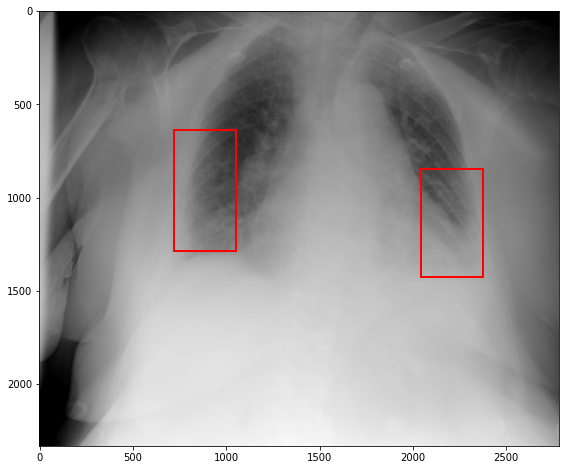

In [17]:
img= dicom.pixel_array

box = image_df.loc[image_df['id']=='65761e66de9f_image'].reset_index(drop=True)
from ast import literal_eval

import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))
ax.imshow(img, cmap="gray")

# Create a Rectangle patch
rect1 = patches.Rectangle((720.65215, 636.51048), 332.19348, 648.12561, linewidth=2, edgecolor='r', facecolor='none')
rect2 = patches.Rectangle((2044.77989, 847.90622), 329.87049, 576.11169, linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
plt.show()

In [18]:
type(img), img.shape

(numpy.ndarray, (2330, 2783))

In [19]:
import os
all_files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        all_files.append(os.path.join(dirname, filename))

In [20]:
from ast import literal_eval

def get_samples(num):
    study_df_grp = pd.melt(study_df, id_vars=list(study_df.columns)[:1], value_vars=list(study_df.columns)[1:],
             var_name='label', value_name='value')
    study_df_grp = study_df_grp.loc[study_df_grp['value']!=0].reset_index(drop=True)
    labels = list(study_df_grp['label'].unique())
    study_samples = {}
    for label in labels:
        study_ids = study_df_grp.loc[study_df_grp['label'] == label].sample(num)['id'].tolist() #Get num sample rows from the datafame
        samples = []
        for study_id in study_ids:
            image = {}
            study_instance_id = study_id.split('_')[0]
            image_id = image_df.loc[image_df['StudyInstanceUID']==study_instance_id]['id'].values[0].split('_')[0] #Get the image matching study id
            file_name = [string for string in all_files if image_id in string]
            image['study_id'] = study_instance_id
            image['dicom_file'] = file_name[0]
            
            #Get the bounding boxes
            box = None
            try:
                box = literal_eval(image_df.loc[image_df['StudyInstanceUID']==study_instance_id]['boxes'].values[0])
            except ValueError:
                pass
            
            image['boxes'] = box
            samples.append(image)
        study_samples[label] = samples
    return study_samples

samples=get_samples(6)

def display_all_class_samples():
    ''' Input : List of samples 
    '''
    all_class_samples = []
    for key in samples:
        sample_dict = samples[key][0]
        sample_dict['class'] = key
        all_class_samples.append(sample_dict)
    fig1, ax1 = plt.subplots(1,4, figsize=(18, 5), facecolor='w', edgecolor='b')
    fig1.subplots_adjust(hspace =.3, wspace=0.3)
    axs = ax1.ravel()
    for item, ax in zip(all_class_samples, axs):
        dicom = read_file(item['dicom_file'], stop_before_pixels=False)
        img = dicom.pixel_array
        ax.imshow(img, cmap="gray")
        if 'boxes' in item and item['boxes'] is not None:
            for box in item['boxes']:             
                rect = patches.Rectangle((box['x'], box['y']), box['width'], box['height'], linewidth=1.5, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
        ax.set_title('{}'.format(item['class']),fontsize = 18)    
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.91)
    plt.suptitle('Samples across all classes',fontsize = 20)
    plt.show()

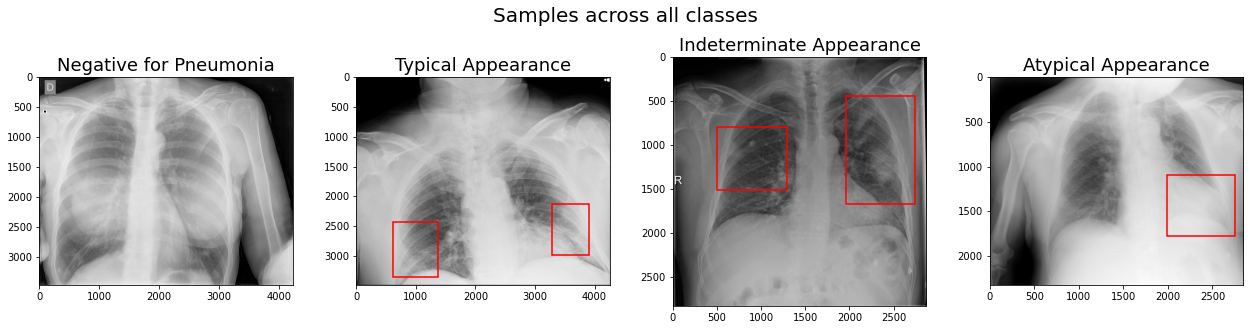

In [21]:
display_all_class_samples()

In [22]:
def display_samples(samples, title, draw_boxes=False):
    ''' Input : List of samples 
    '''
    fig1, ax1 = plt.subplots(2,3, figsize=(18, 12), facecolor='w', edgecolor='b')
    fig1.subplots_adjust(hspace =.3, wspace=0.3)
    axs = ax1.ravel()
    for item, ax in zip(samples, axs):
        dicom = read_file(item['dicom_file'], stop_before_pixels=False)
        img = dicom.pixel_array
        ax.imshow(img, cmap="gray")
        if draw_boxes == True and item['boxes'] is not None:
            for box in item['boxes']:             
                rect = patches.Rectangle((box['x'], box['y']), box['width'], box['height'], linewidth=1.5, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
        ax.set_title('Study : {}'.format(item['study_id']),fontsize = 18)
        
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.91)
    plt.suptitle(title,fontsize = 20)
    plt.show()

# **Negative for pneumonia**

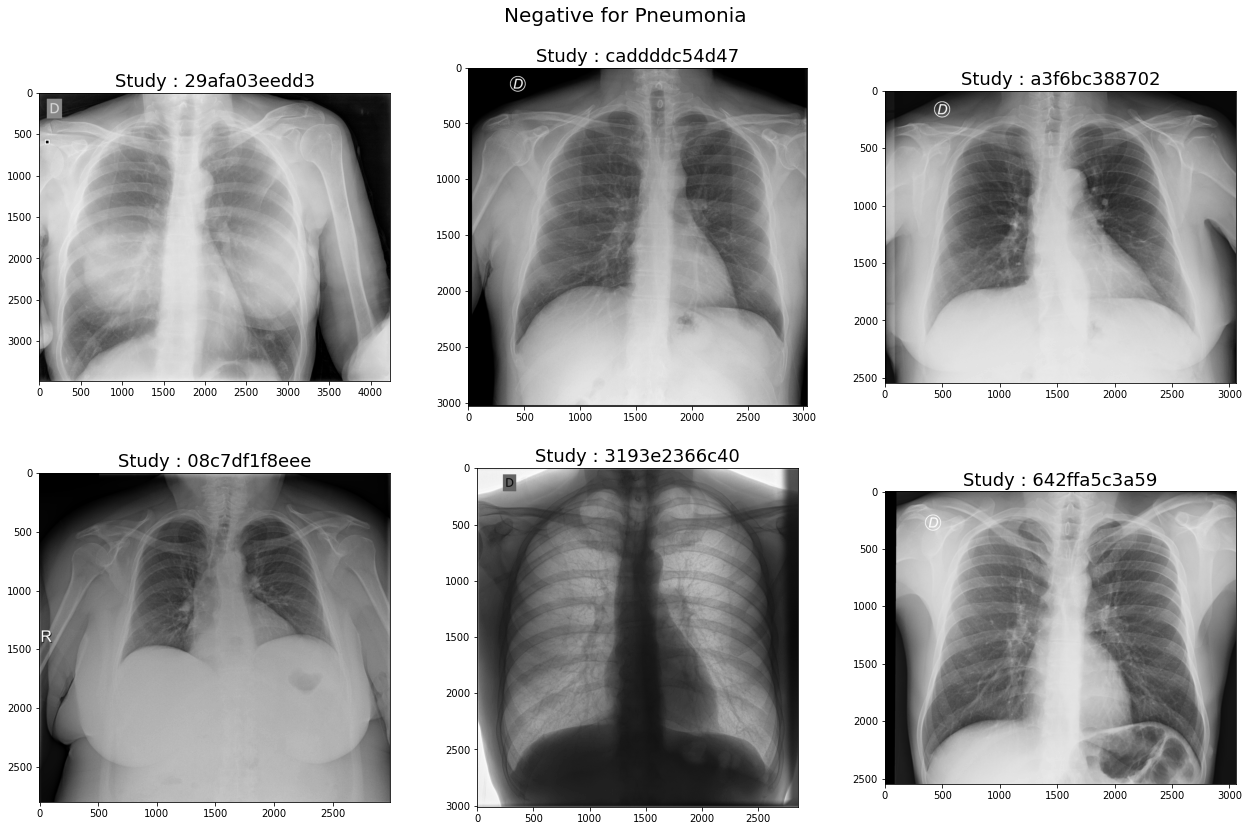

In [23]:
display_samples(samples['Negative for Pneumonia'],'Negative for Pneumonia')

In [24]:
def display_histogram(samples, title):
    ''' Input : List of samples 
    '''
    fig1, ax1 = plt.subplots(2,3, figsize=(18, 12), facecolor='w', edgecolor='b')
    fig1.subplots_adjust(hspace =.3, wspace=0.3)
    axs = ax1.ravel()
    for item, ax in zip(samples, axs):
        dicom = read_file(item['dicom_file'], stop_before_pixels=False)
        img = dicom.pixel_array
        sub_plot = sns.histplot(img.flatten(), ax=ax)
        ax.set_title('Study : {}'.format(item['study_id']),fontsize = 18)
        
    plt.tight_layout(pad=3.0)
    plt.subplots_adjust(top=0.91)
    plt.suptitle('Image Histogram - {}'.format(title),fontsize = 20)
    plt.show()

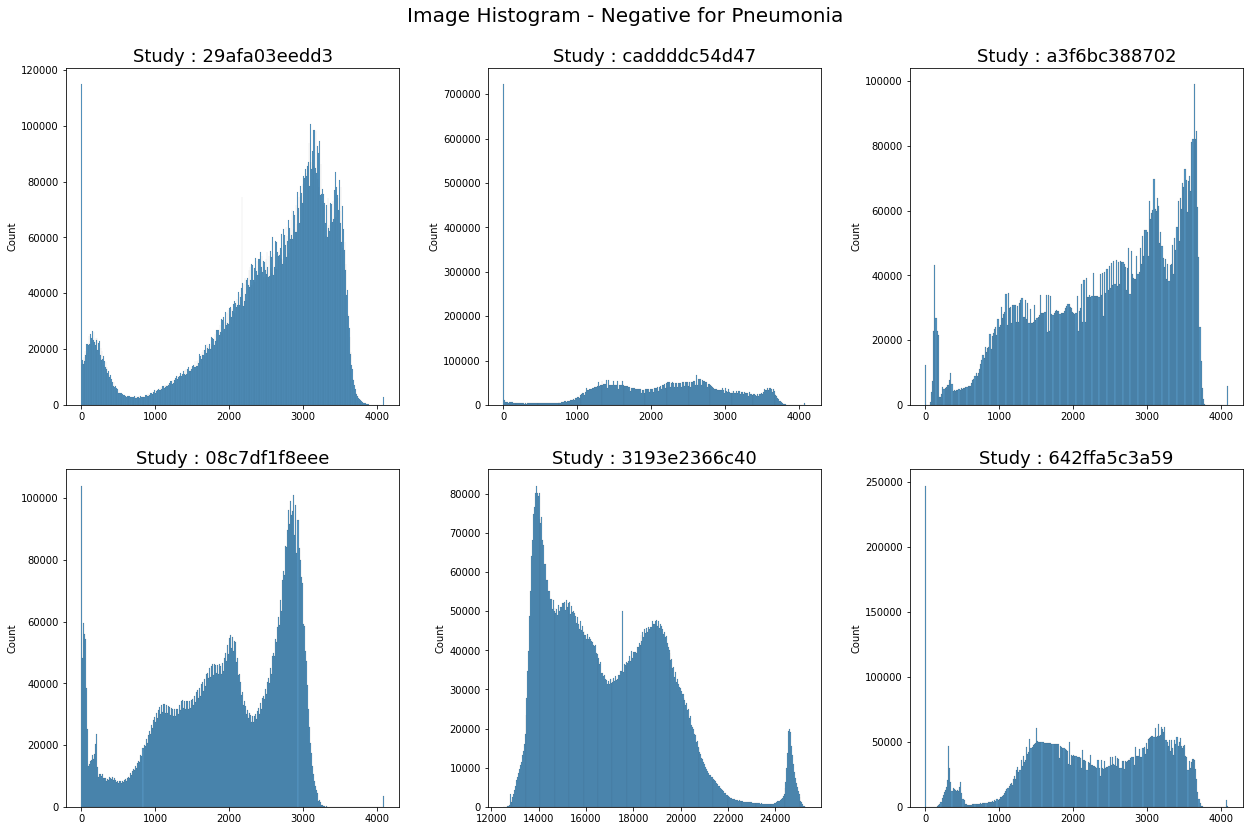

In [25]:
display_histogram(samples['Negative for Pneumonia'],'Negative for Pneumonia')

# **Typical Pneumonia**

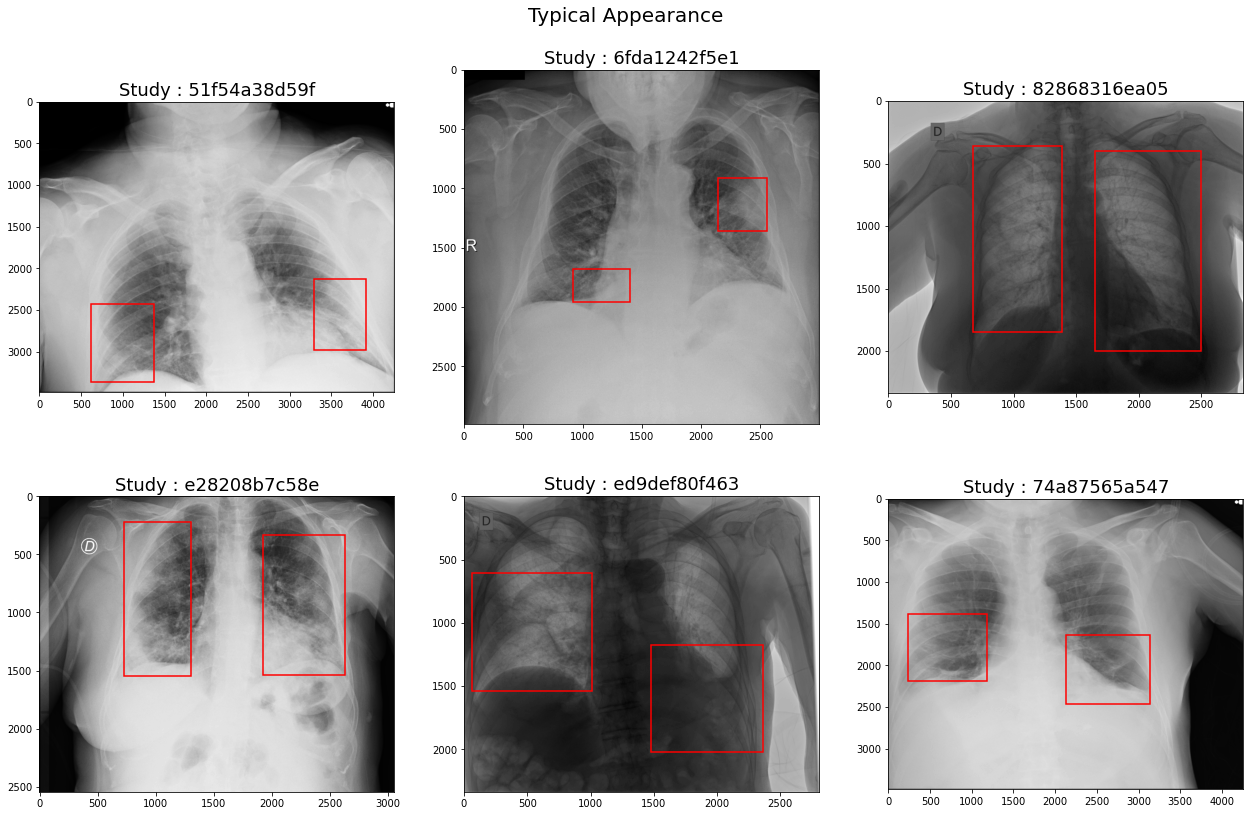

In [26]:
display_samples(samples['Typical Appearance'],'Typical Appearance', draw_boxes=True)

In [27]:
#display_histogram(samples['Typical Appearance'],'Typical Appearance')

# **Intermediate Appearance**

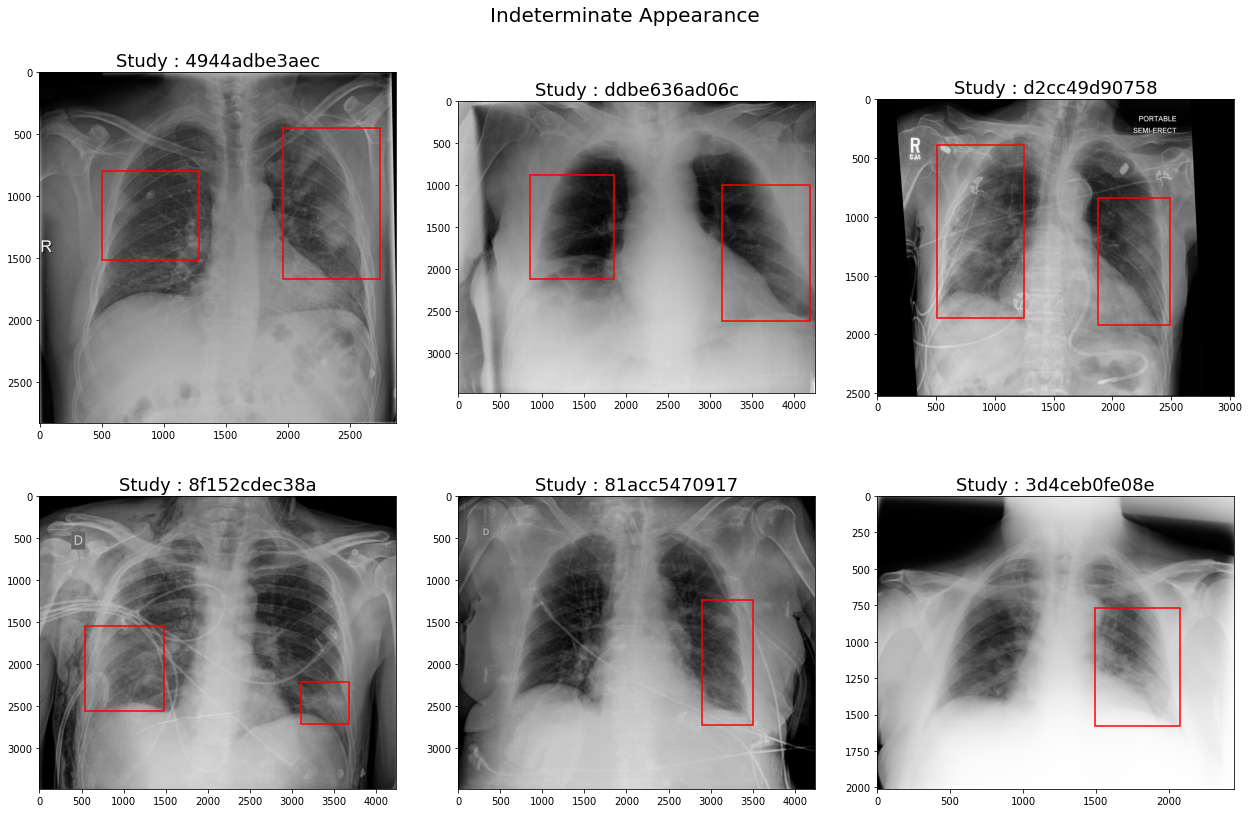

In [28]:
display_samples(samples['Indeterminate Appearance'],'Indeterminate Appearance', draw_boxes=True)

In [29]:
#display_histogram(samples['Indeterminate Appearance'],'Indeterminate Appearance')

# **Atypical Appearance**

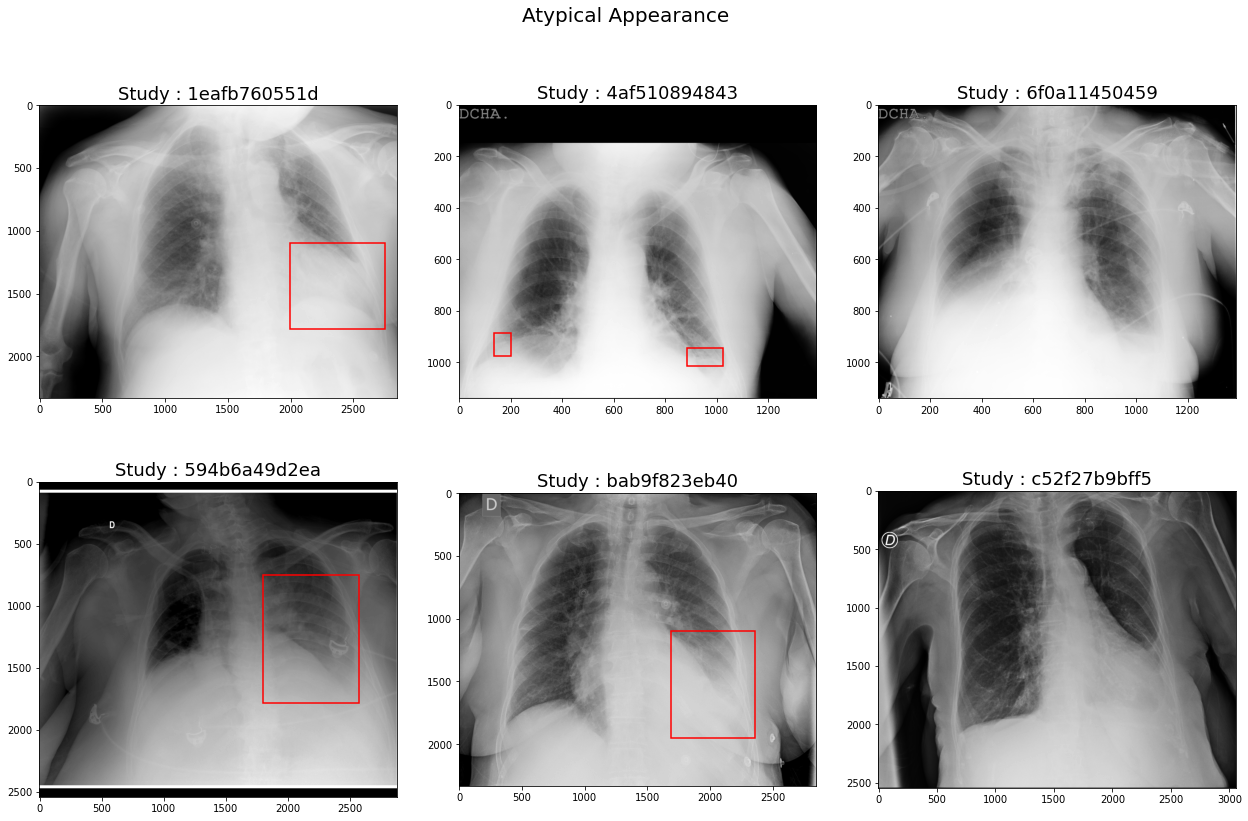

In [30]:
display_samples(samples['Atypical Appearance'],'Atypical Appearance', draw_boxes=True)

In [31]:
#display_histogram(samples['Atypical Appearance'],'Atypical Appearance')

# **Metadata dicom**